In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
img1 = cv2.imread('img1.jpg', cv2.IMREAD_GRAYSCALE)

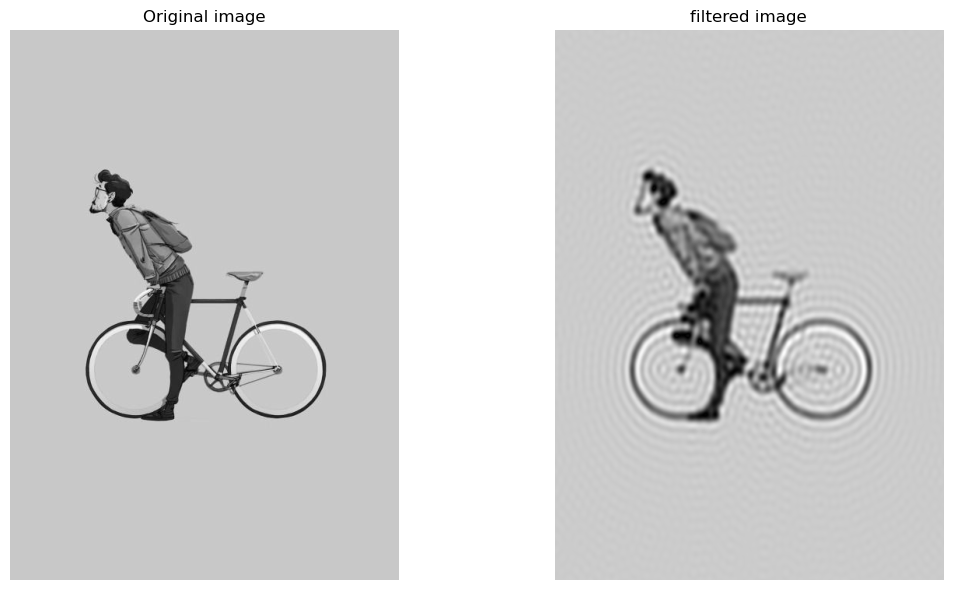

True

In [ ]:

def apply_lowpass_filter(img, cutoff_freq):
    img_float32 = np.float32(img)
    dft = cv2.dft(img_float32, flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    rows, cols = img.shape
    center_row, center_col = rows // 2, cols // 2
    mask = np.ones((rows, cols), np.float32)
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center_row)**2 + (j - center_col)**2)
            if distance > cutoff_freq:
                mask[i, j] = 0

    filtered_shift = dft_shift * mask[:, :, np.newaxis]
    filtered_ishift = np.fft.ifftshift(filtered_shift)
    img_back = cv2.idft(filtered_ishift)
    img_filtered = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])
    img_filtered = cv2.normalize(img_filtered, None, 0, 255, cv2.NORM_MINMAX)
    img_filtered = np.uint8(img_filtered)
    
    return img_filtered



lowpass_result = apply_lowpass_filter(img1, 50)

plt.figure(figsize=(12, 6))
plt.subplot(1 , 2, 1)
plt.imshow(img1 , cmap='gray')
plt.title('Original image')
plt.axis('off') 

plt.subplot(1 , 2 , 2)
plt.imshow(lowpass_result , cmap='gray')
plt.title('filtered image')
plt.axis('off') 

plt.tight_layout()
plt.show()


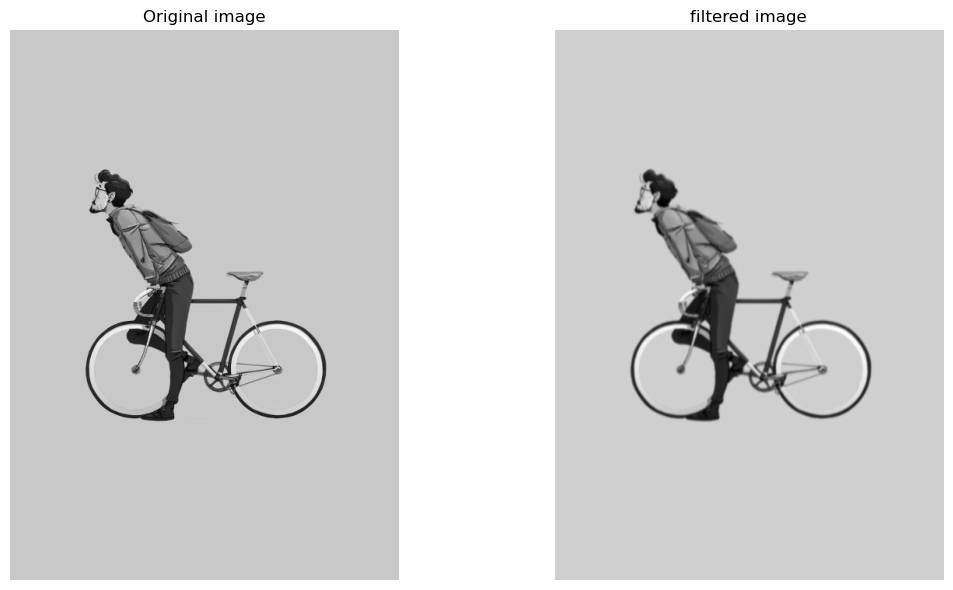

In [12]:

def apply_gaussian_lowpass_filter(img, cutoff_freq):
    img_float32 = np.float32(img)
    dft = cv2.dft(img_float32, flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    rows, cols = img.shape
    center_row, center_col = rows // 2, cols // 2
    mask = np.ones((rows, cols), np.float32)
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center_row)**2 + (j - center_col)**2)
            mask[i, j] = np.exp(-(distance**2) / (2 * (cutoff_freq**2)))

    filtered_shift = dft_shift * mask[:, :, np.newaxis]
    filtered_ishift = np.fft.ifftshift(filtered_shift)
    img_back = cv2.idft(filtered_ishift)
    img_filtered = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])
    img_filtered = cv2.normalize(img_filtered, None, 0, 255, cv2.NORM_MINMAX)
    img_filtered = np.uint8(img_filtered)
    
    return img_filtered



gaussian_lowpass_result = apply_gaussian_lowpass_filter(img1, 100)

plt.figure(figsize=(12, 6))
plt.subplot(1 , 2, 1)
plt.imshow(img1 , cmap='gray')
plt.title('Original image')
plt.axis('off') 

plt.subplot(1 , 2 , 2)
plt.imshow(gaussian_lowpass_result , cmap='gray')
plt.title('filtered image')
plt.axis('off') 

plt.tight_layout()
plt.show()

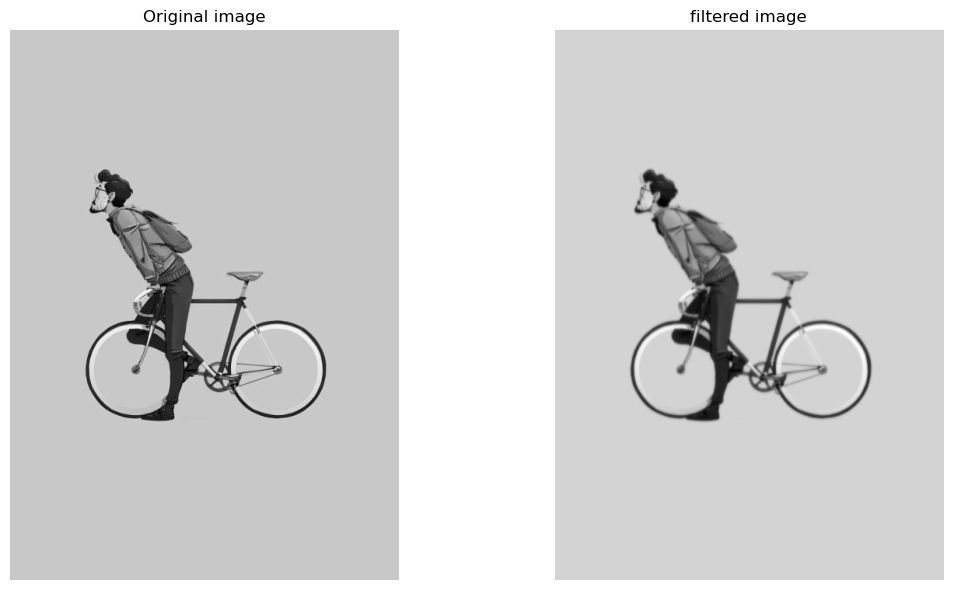

In [26]:

def apply_butterworth_lowpass_filter(img, cutoff_freq , filter_order):
    img_float32 = np.float32(img)
    dft = cv2.dft(img_float32, flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    rows, cols = img.shape
    center_row, center_col = rows // 2, cols // 2
    mask = np.ones((rows, cols), np.float32)
    
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center_row)**2 + (j - center_col)**2)
            if distance == 0:
                mask[i, j] = 1
            else:
                mask[i, j] = 1 / (1 + (distance / cutoff_freq)**(2*(filter_order)))

    filtered_shift = dft_shift * mask[:, :, np.newaxis]
    filtered_ishift = np.fft.ifftshift(filtered_shift)
    img_back = cv2.idft(filtered_ishift)
    img_filtered = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])
    img_filtered = cv2.normalize(img_filtered, None, 0, 255, cv2.NORM_MINMAX)
    img_filtered = np.uint8(img_filtered)
    
    return img_filtered



butterworth_lowpass_result = apply_butterworth_lowpass_filter(img1, 100 , 1)

plt.figure(figsize=(12, 6))
plt.subplot(1 , 2, 1)
plt.imshow(img1 , cmap='gray')
plt.title('Original image')
plt.axis('off') 

plt.subplot(1 , 2 , 2)
plt.imshow(butterworth_lowpass_result, cmap='gray')
plt.title('filtered image')
plt.axis('off') 

plt.tight_layout()
plt.show()

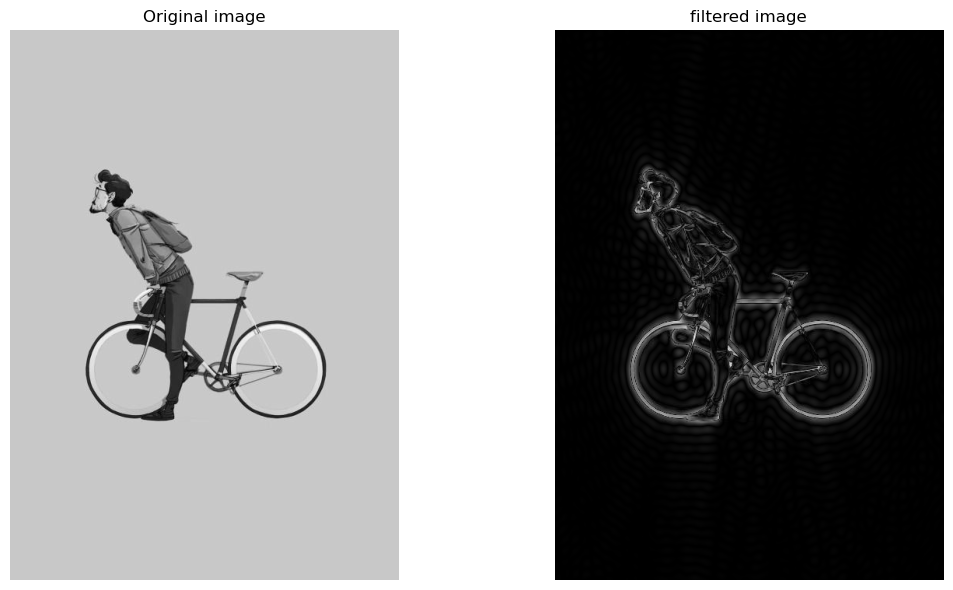

In [27]:

def apply_highpass_filter(img, cutoff_freq):
    img_float32 = np.float32(img)
    dft = cv2.dft(img_float32, flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    rows, cols = img.shape
    center_row, center_col = rows // 2, cols // 2
    mask = np.ones((rows, cols), np.float32)
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center_row)**2 + (j - center_col)**2)
            if distance < cutoff_freq:
                mask[i, j] = 0

    filtered_shift = dft_shift * mask[:, :, np.newaxis]
    filtered_ishift = np.fft.ifftshift(filtered_shift)
    img_back = cv2.idft(filtered_ishift)
    img_filtered = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])
    img_filtered = cv2.normalize(img_filtered, None, 0, 255, cv2.NORM_MINMAX)
    img_filtered = np.uint8(img_filtered)
    
    return img_filtered



highpass_result = apply_highpass_filter(img1, 30)


plt.figure(figsize=(12, 6))
plt.subplot(1 , 2, 1)
plt.imshow(img1 , cmap='gray')
plt.title('Original image')
plt.axis('off') 

plt.subplot(1 , 2 , 2)
plt.imshow(highpass_result , cmap='gray')
plt.title('filtered image')
plt.axis('off') 

plt.tight_layout()
plt.show()

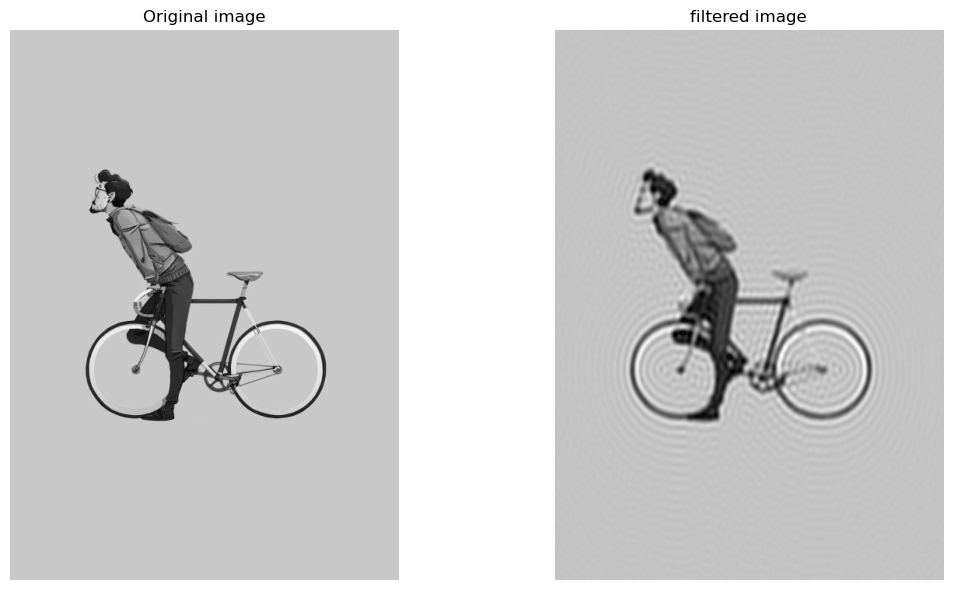

In [30]:

def apply_bandpass_filter(img, cutoff_freq , band_width):
    img_float32 = np.float32(img)
    dft = cv2.dft(img_float32, flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    rows, cols = img.shape
    center_row, center_col = rows // 2, cols // 2
    mask = np.ones((rows, cols), np.float32)
    inner_cutoff = cutoff_freq - band_width
    outer_cutoff = cutoff_freq + band_width
    
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center_row)**2 + (j - center_col)**2)
            if distance < inner_cutoff or distance > outer_cutoff:
                mask[i, j] = 0

    filtered_shift = dft_shift * mask[:, :, np.newaxis]
    filtered_ishift = np.fft.ifftshift(filtered_shift)
    img_back = cv2.idft(filtered_ishift)
    img_filtered = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])
    img_filtered = cv2.normalize(img_filtered, None, 0, 255, cv2.NORM_MINMAX)
    img_filtered = np.uint8(img_filtered)
    
    return img_filtered



bandpass_result = apply_bandpass_filter(img1, 30 , 30)

plt.figure(figsize=(12, 6))
plt.subplot(1 , 2, 1)
plt.imshow(img1 , cmap='gray')
plt.title('Original image')
plt.axis('off') 

plt.subplot(1 , 2 , 2)
plt.imshow(bandpass_result , cmap='gray')
plt.title('filtered image')
plt.axis('off') 

plt.tight_layout()
plt.show()

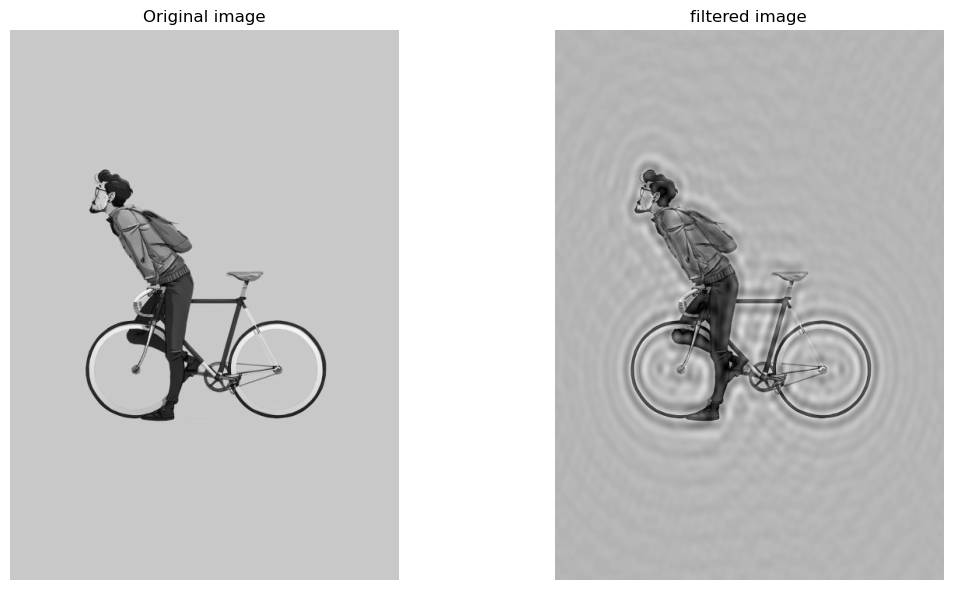

In [31]:

def apply_bandstop_filter(img, cutoff_freq , band_width):
    img_float32 = np.float32(img)
    dft = cv2.dft(img_float32, flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    rows, cols = img.shape
    center_row, center_col = rows // 2, cols // 2
    mask = np.ones((rows, cols), np.float32)

    inner_cutoff = cutoff_freq - band_width
    outer_cutoff = cutoff_freq + band_width
    
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center_row)**2 + (j - center_col)**2)
            if inner_cutoff <= distance <= outer_cutoff:
                mask[i, j] = 0

    filtered_shift = dft_shift * mask[:, :, np.newaxis]
    filtered_ishift = np.fft.ifftshift(filtered_shift)
    img_back = cv2.idft(filtered_ishift)
    img_filtered = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])
    img_filtered = cv2.normalize(img_filtered, None, 0, 255, cv2.NORM_MINMAX)
    img_filtered = np.uint8(img_filtered)
    
    return img_filtered



bandstop_result = apply_bandstop_filter(img1, 30 , 10)

plt.figure(figsize=(12, 6))
plt.subplot(1 , 2, 1)
plt.imshow(img1 , cmap='gray')
plt.title('Original image')
plt.axis('off') 

plt.subplot(1 , 2 , 2)
plt.imshow(bandstop_result , cmap='gray')
plt.title('filtered image')
plt.axis('off') 

plt.tight_layout()
plt.show()

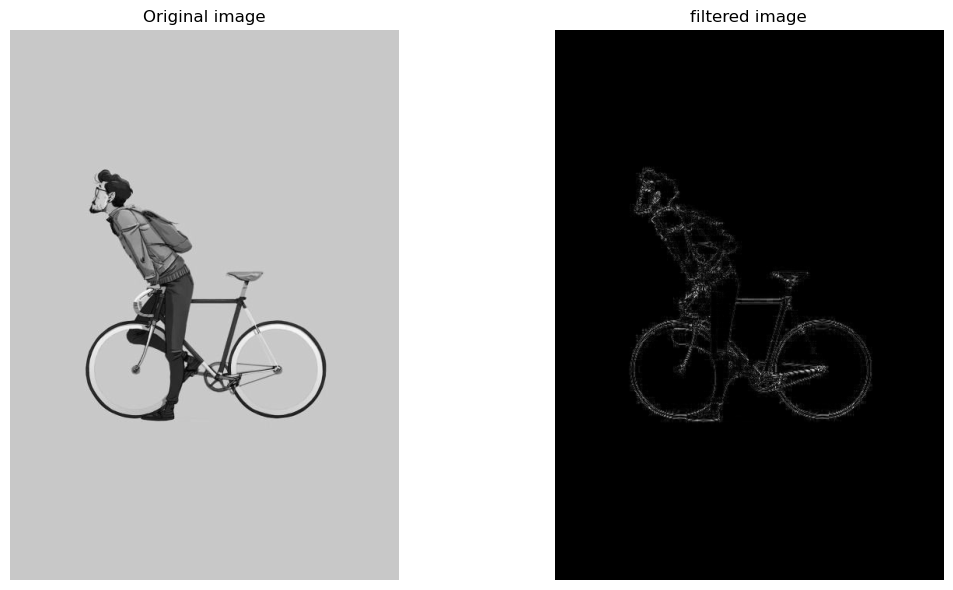

In [32]:

def apply_laplacian_filter(img, cutoff_freq):
    img_float32 = np.float32(img)
    dft = cv2.dft(img_float32, flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    rows, cols = img.shape
    center_row, center_col = rows // 2, cols // 2
    
    crow, ccol = rows // 2, cols // 2
    u = np.arange(rows).reshape(-1, 1) - crow
    v = np.arange(cols).reshape(1, -1) - ccol
    D2 = u**2 + v**2
    mask = -4 * np.pi**2 * D2

    filtered_shift = dft_shift * mask[:, :, np.newaxis]
    filtered_ishift = np.fft.ifftshift(filtered_shift)
    img_back = cv2.idft(filtered_ishift)
    img_filtered = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])
    img_filtered = cv2.normalize(img_filtered, None, 0, 255, cv2.NORM_MINMAX)
    img_filtered = np.uint8(img_filtered)
    
    return img_filtered



laplacian_result = apply_laplacian_filter(img1, 2)

plt.figure(figsize=(12, 6))
plt.subplot(1 , 2, 1)
plt.imshow(img1 , cmap='gray')
plt.title('Original image')
plt.axis('off') 

plt.subplot(1 , 2 , 2)
plt.imshow(laplacian_result , cmap='gray')
plt.title('filtered image')
plt.axis('off') 

plt.tight_layout()
plt.show()

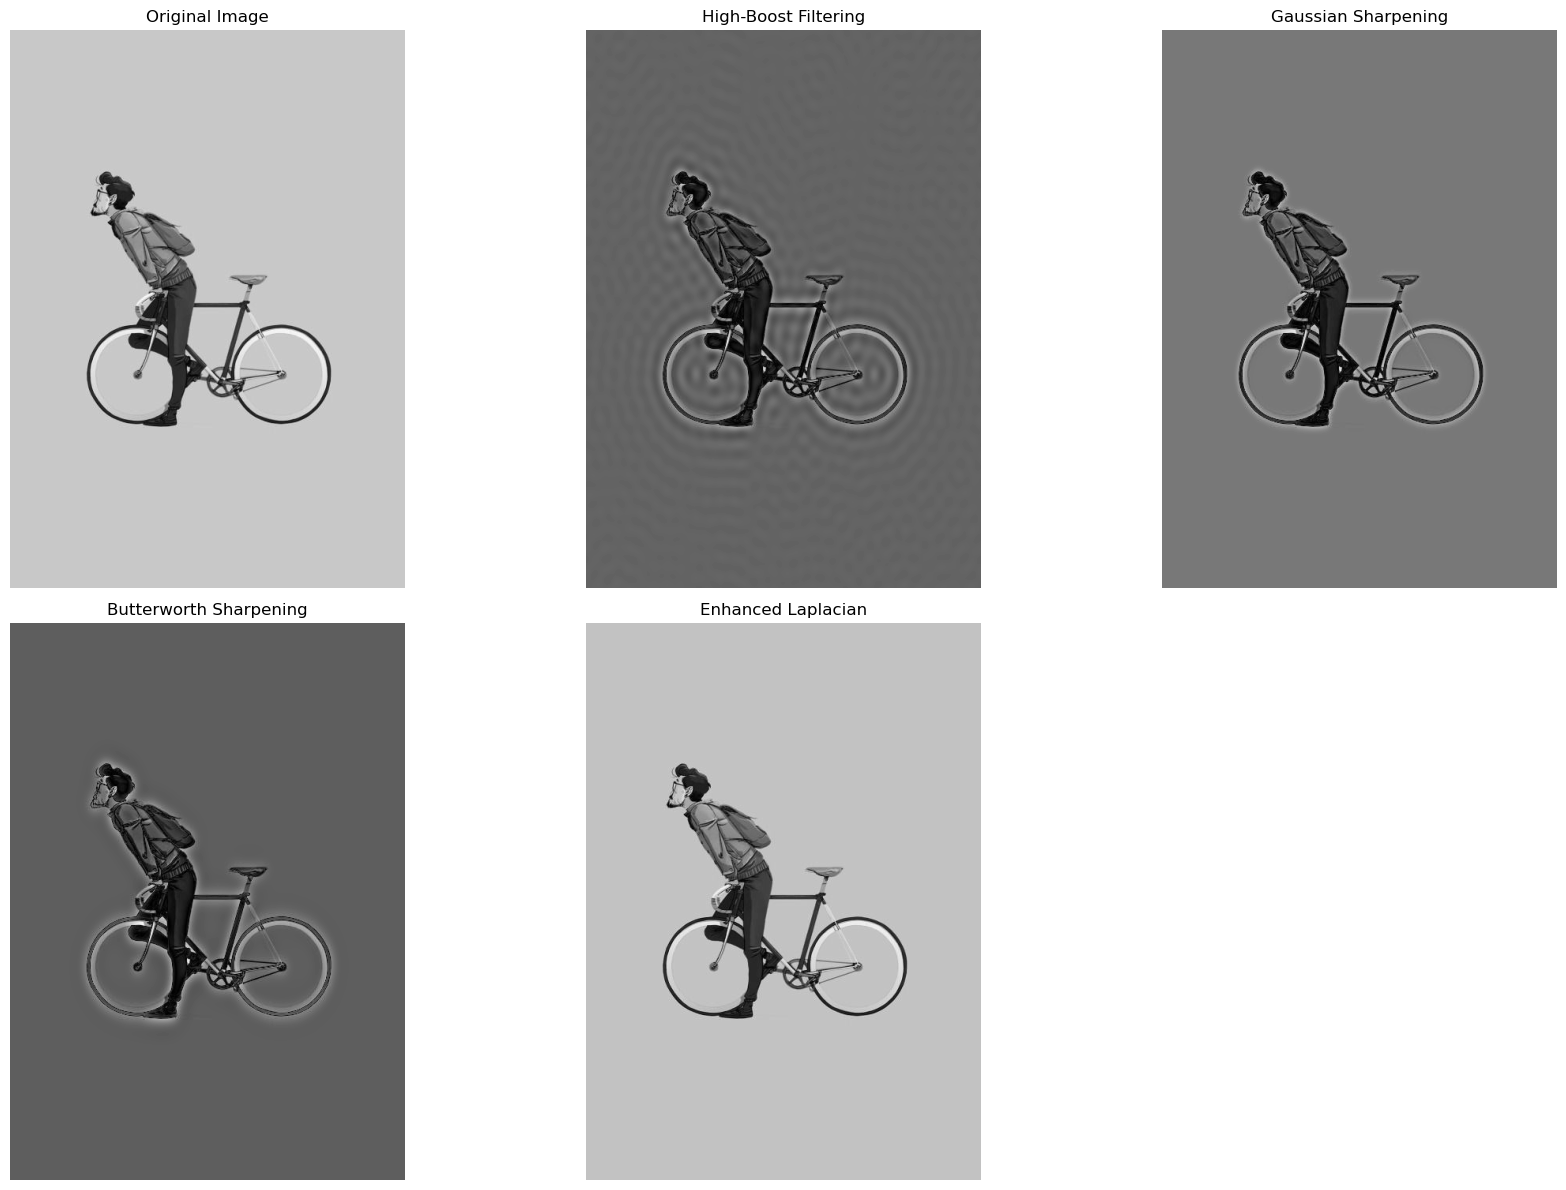

In [33]:
def apply_spectral_sharpening(img, cutoff_freq, alpha=1.0, n = 2 ,  filter_type='high_boost' ):
    img_float32 = np.float32(img)
    dft = cv2.dft(img_float32, flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    rows, cols = img.shape
    center_row, center_col = rows // 2, cols // 2
    u = np.arange(rows).reshape(-1, 1) - center_row
    v = np.arange(cols).reshape(1, -1) - center_col
    D = np.sqrt(u**2 + v**2)

    
    if filter_type == 'high_boost':
        H_low = np.zeros((rows, cols))
        H_low[D <= cutoff_freq] = 1
        H_high = 1 - H_low
        H = 1 + alpha * H_high
        
    elif filter_type == 'gaussian':
        H_low = np.exp(-(D**2) / (2 * cutoff_freq**2))
        H_high = 1 - H_low
        H = 1 + alpha * H_high
        
    elif filter_type == 'butterworth':
        H_low = 1 / (1 + (D / cutoff_freq)**(2*n))
        H_high = 1 - H_low
        H = 1 + alpha * H_high
        
    elif filter_type == 'laplacian_enhanced':
        D2 = u**2 + v**2
        H_laplacian = -4 * np.pi**2 * D2
        H_laplacian_norm = H_laplacian / np.max(np.abs(H_laplacian))
        H = 1 - alpha * H_laplacian_norm
    
    filtered_shift = dft_shift * H[:, :, np.newaxis]
    filtered_ishift = np.fft.ifftshift(filtered_shift)
    img_back = cv2.idft(filtered_ishift)
    img_filtered = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])
    img_filtered = cv2.normalize(img_filtered, None, 0, 255, cv2.NORM_MINMAX)
    img_filtered = np.uint8(img_filtered)
    
    return img_filtered



plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
plt.imshow(img1, cmap='gray')
plt.title('Original Image')
plt.axis('off')

high_boost_result = apply_spectral_sharpening(img1, cutoff_freq=30, alpha=1.5, n = 2 ,  filter_type='high_boost' )
plt.subplot(2, 3, 2)
plt.imshow(high_boost_result, cmap='gray')
plt.title('High-Boost Filtering')
plt.axis('off')

# Gaussian unsharp masking
gaussian_result = apply_spectral_sharpening(img1, cutoff_freq=25, alpha=1.2,  n = 2 , filter_type='gaussian' )
plt.subplot(2, 3, 3)
plt.imshow(gaussian_result, cmap='gray')
plt.title('Gaussian Sharpening')
plt.axis('off')

# Butterworth sharpening
butterworth_result = apply_spectral_sharpening(img1, cutoff_freq=20, alpha=1.8, n=2 ,  filter_type='butterworth' )
plt.subplot(2, 3, 4)
plt.imshow(butterworth_result, cmap='gray')
plt.title('Butterworth Sharpening')
plt.axis('off')

# Enhanced Laplacian
laplacian_result = apply_spectral_sharpening(img1, cutoff_freq=15, alpha=0.5, n =2 ,  filter_type='laplacian_enhanced' )
plt.subplot(2, 3, 5)
plt.imshow(laplacian_result, cmap='gray')
plt.title('Enhanced Laplacian')
plt.axis('off')


plt.tight_layout()
plt.show()

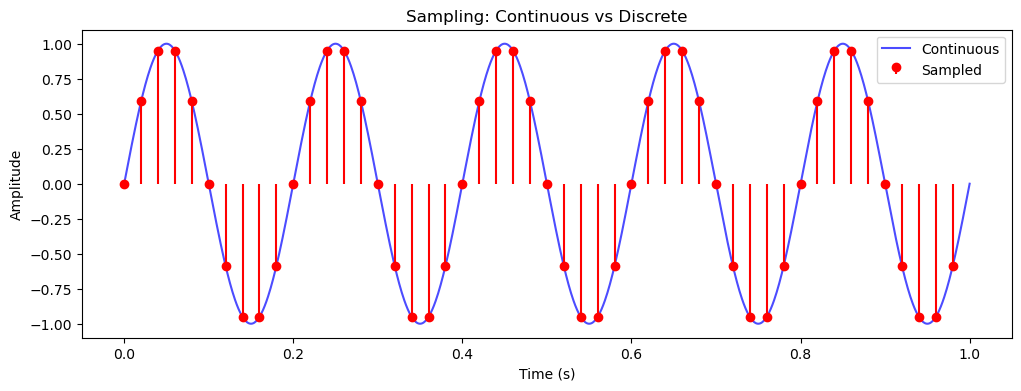

In [37]:
import numpy as np
import matplotlib.pyplot as plt
t_continuous = np.linspace(0, 1, 1000)
f_continuous = np.sin(2 * np.pi * 5 * t_continuous)  
sampling_rate = 50
t_sampled = np.arange(0, 1, 1/sampling_rate)
f_sampled = np.sin(2 * np.pi * 5 * t_sampled)

plt.figure(figsize=(12, 4))
plt.plot(t_continuous, f_continuous, 'b-', label='Continuous', alpha=0.7)
plt.stem(t_sampled, f_sampled, 'r-', label='Sampled', basefmt=" ")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Sampling: Continuous vs Discrete')
plt.show()

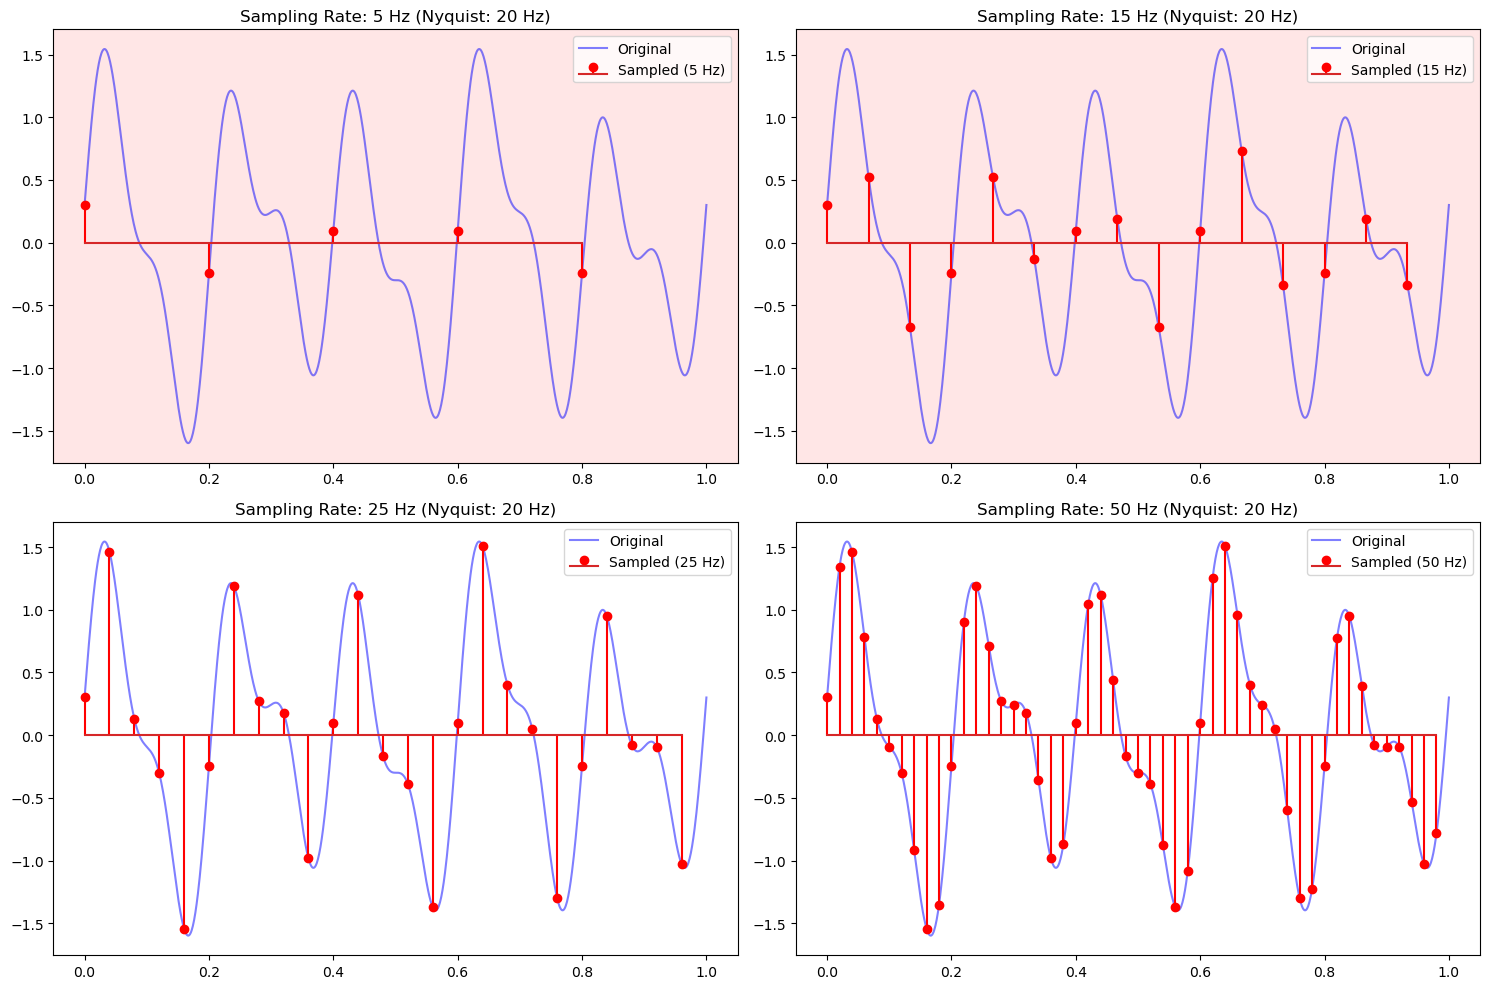

In [ ]:
def demonstrate_sampling_theorem():
    
    t = np.linspace(0, 1, 1000)
    f_signal = 10 
    signal = (np.sin(2 * np.pi * 5 * t) +  0.5 * np.sin(2 * np.pi * 10 * t) + 0.3 * np.cos(2 * np.pi * 3 * t))
    rates = [5, 15, 25, 50]  
    nyquist_rate = 2 * f_signal 
    
    plt.figure(figsize=(15, 10))
    
    for i, rate in enumerate(rates):
        # Sample the signal
        t_sampled = np.arange(0, 1, 1/rate)
        signal_sampled = (np.sin(2 * np.pi * 5 * t_sampled) +  0.5 * np.sin(2 * np.pi * 10 * t_sampled) + 0.3 * np.cos(2 * np.pi * 3 * t_sampled))
        
        plt.subplot(2, 2, i+1)
        plt.plot(t, signal, 'b-', alpha=0.5, label='Original')
        plt.stem(t_sampled, signal_sampled, 'r-', label=f'Sampled ({rate} Hz)')
        plt.title(f'Sampling Rate: {rate} Hz (Nyquist: {nyquist_rate} Hz)')
        plt.legend()
        
        if rate < nyquist_rate:
            plt.gca().set_facecolor((1, 0.9, 0.9))  
    
    plt.tight_layout()
    plt.show()

demonstrate_sampling_theorem()

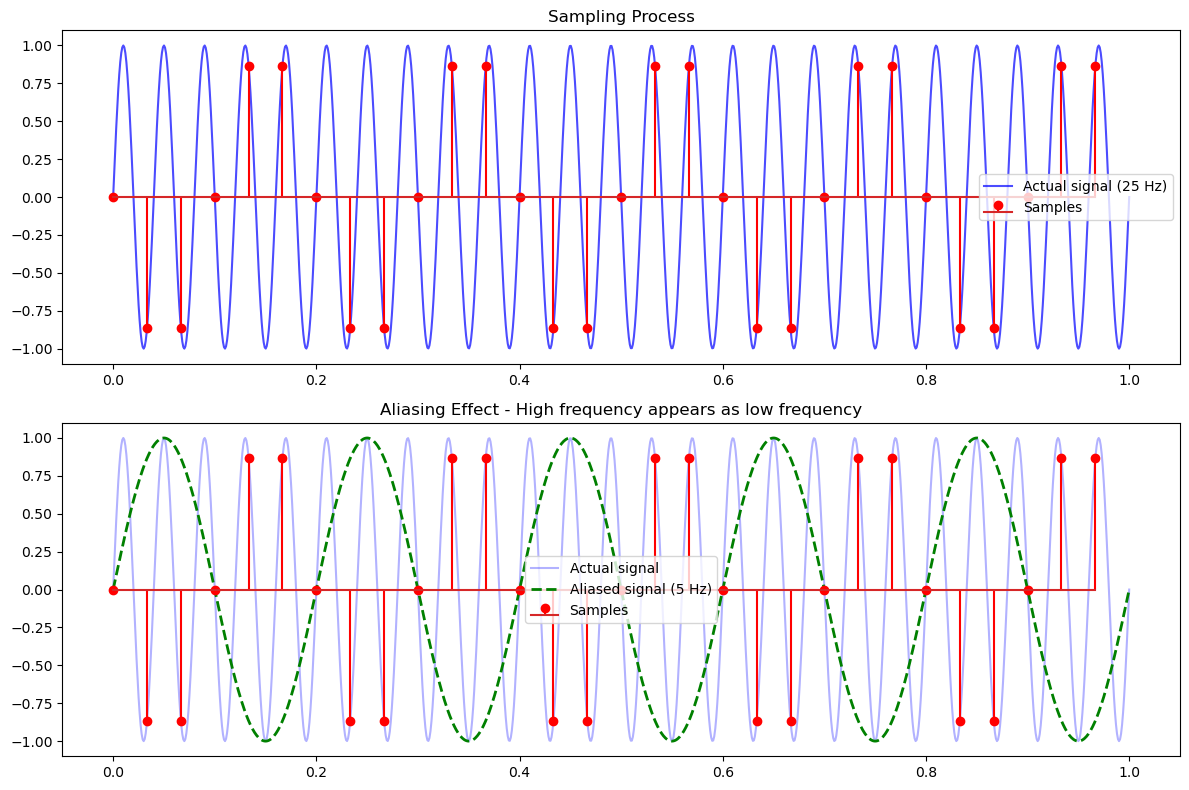

In [39]:
def demonstrate_aliasing():
    # High frequency signal
    f_actual = 25  # Hz - actual signal frequency
    t_continuous = np.linspace(0, 1, 1000)
    actual_signal = np.sin(2 * np.pi * f_actual * t_continuous)
    
    # Under-sampling
    sampling_rate = 30  # Hz (less than 2*25 = 50 Hz)
    t_sampled = np.arange(0, 1, 1/sampling_rate)
    sampled_signal = np.sin(2 * np.pi * f_actual * t_sampled)
    
    # What we perceive (aliased frequency)
    f_aliased = sampling_rate - f_actual  # 30 - 25 = 5 Hz
    aliased_signal = np.sin(2 * np.pi * f_aliased * t_continuous)
    
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 1, 1)
    plt.plot(t_continuous, actual_signal, 'b-', label=f'Actual signal ({f_actual} Hz)', alpha=0.7)
    plt.stem(t_sampled, sampled_signal, 'r-', label='Samples')
    plt.title('Sampling Process')
    plt.legend()
    
    plt.subplot(2, 1, 2)
    plt.plot(t_continuous, actual_signal, 'b-', label='Actual signal', alpha=0.3)
    plt.plot(t_continuous, aliased_signal, 'g--', label=f'Aliased signal ({f_aliased} Hz)', linewidth=2)
    plt.stem(t_sampled, sampled_signal, 'r-', label='Samples')
    plt.title('Aliasing Effect - High frequency appears as low frequency')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

demonstrate_aliasing()

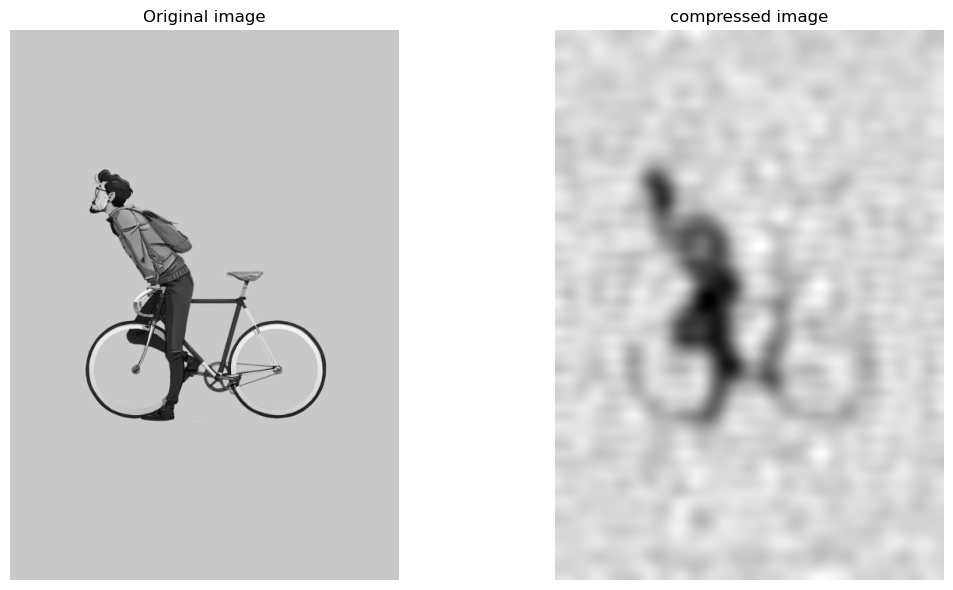

Original image size: 353500 pixels
Non-zero coefficients after thresholding: 177
Percentage of coefficients kept: 0.1%


In [14]:

def apply_dct_threshold_cv2(image, threshold_percent=0.1 ):
    img_float = image.astype(np.float32)
    dct_coeff = cv2.dct(img_float)
    coeff_magnitude = np.abs(dct_coeff)
    sorted_coeff = np.sort(coeff_magnitude.flatten())[::-1] 
    threshold_value = sorted_coeff[int(len(sorted_coeff) * threshold_percent)]
    dct_thresholded = dct_coeff * (coeff_magnitude >= threshold_value)
    img_reconstructed = cv2.idct(dct_thresholded)
    img_reconstructed = np.clip(img_reconstructed, 0, 255).astype(np.uint8)
    
    return img_reconstructed, dct_thresholded

threshold_percent = 0.0005
reconstructed_img, thresholded_coeff = apply_dct_threshold_cv2(img1, threshold_percent)

plt.figure(figsize=(12, 6))
plt.subplot(1 , 2, 1)
plt.imshow(img1 , cmap='gray')
plt.title('Original image')
plt.axis('off') 

plt.subplot(1 , 2 , 2)
plt.imshow(reconstructed_img, cmap='gray')
plt.title('compressed image')
plt.axis('off') 

plt.tight_layout()
plt.show()

# Print compression statistics
original_size = img1.size
nonzero_coeff = np.count_nonzero(thresholded_coeff)
compression_ratio = original_size / nonzero_coeff if nonzero_coeff > 0 else float('inf')

print(f"Original image size: {original_size} pixels")
print(f"Non-zero coefficients after thresholding: {nonzero_coeff}")
print(f"Percentage of coefficients kept: {threshold_percent*100:.1f}%")